In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# Load data and do some preprocessing

In [3]:
df = pd.DataFrame({k: np.squeeze(v) for k, v in np.load('../data/decision.npz').iteritems()})

In [4]:
df['condition'] = df.apply(lambda x: '{}, {}, {}'.format(
    x['network'], x['scale'], x['share_thresholding_intercepts']), axis=1)
cond_order = ['LCA, 1.0, False', 'IA, 1.0, False', 'IA, 0.2, False', 'IA, 1.0, True', 'IA, 0.2, True']

In [5]:
dfd = df.query('decided == True')

# Plotting conventions

The optimal value will be marked by a blue horizontal line in each plot.

# Fraction of successful decisions

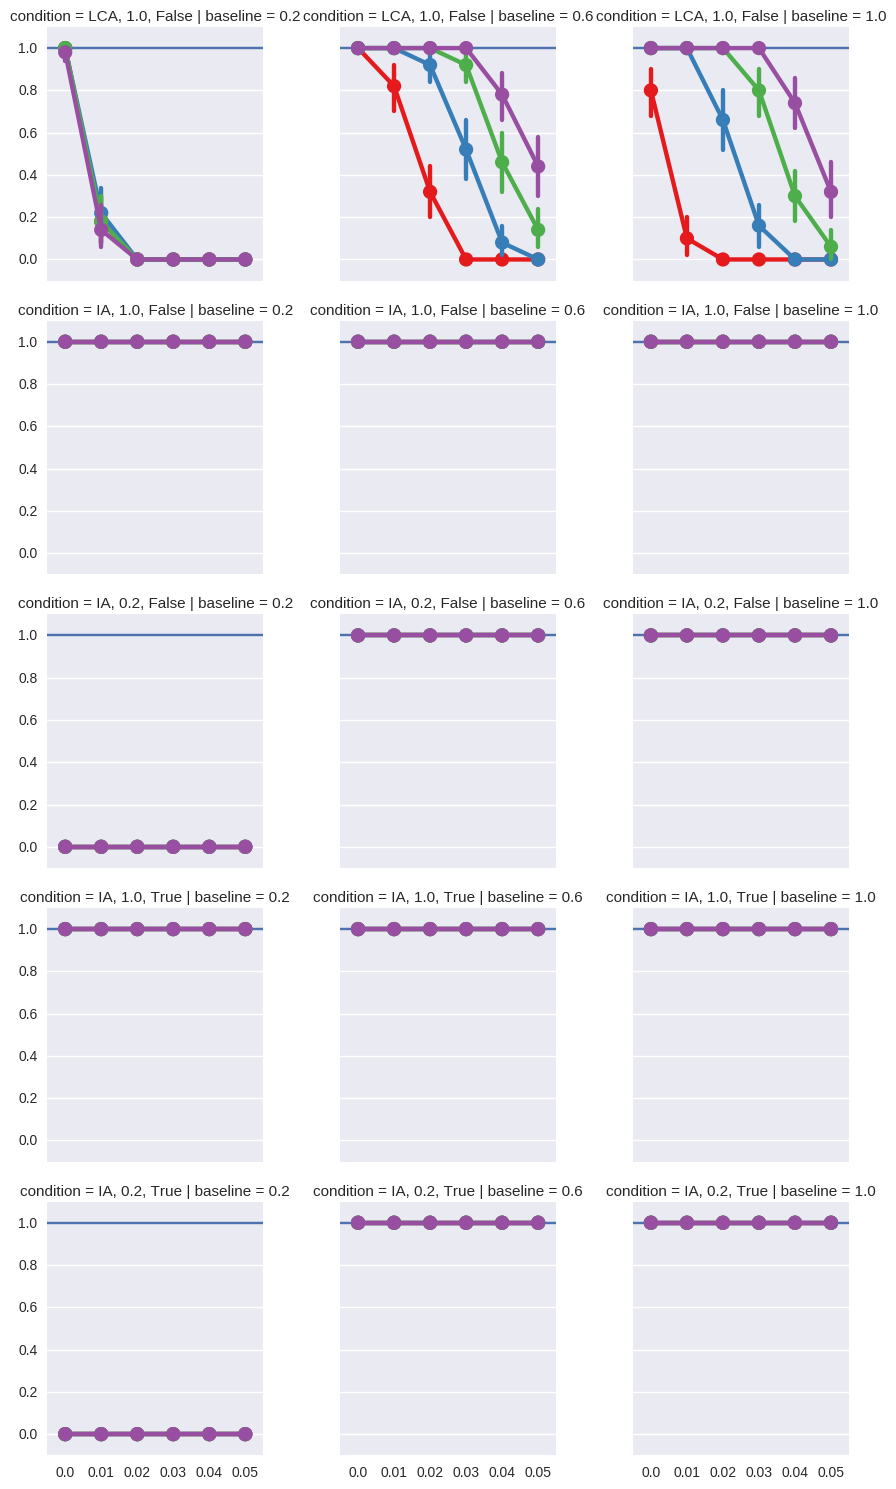

In [6]:
g = sns.FacetGrid(df, row='condition', col='baseline', row_order=cond_order)
g.map(sns.pointplot, 'noise', 'decided', 'target_sep', palette='Set1')
g.map(plt.axhline, y=1.)
g.set(ylim=(-0.1, 1.1))

# Fraction of correct trials

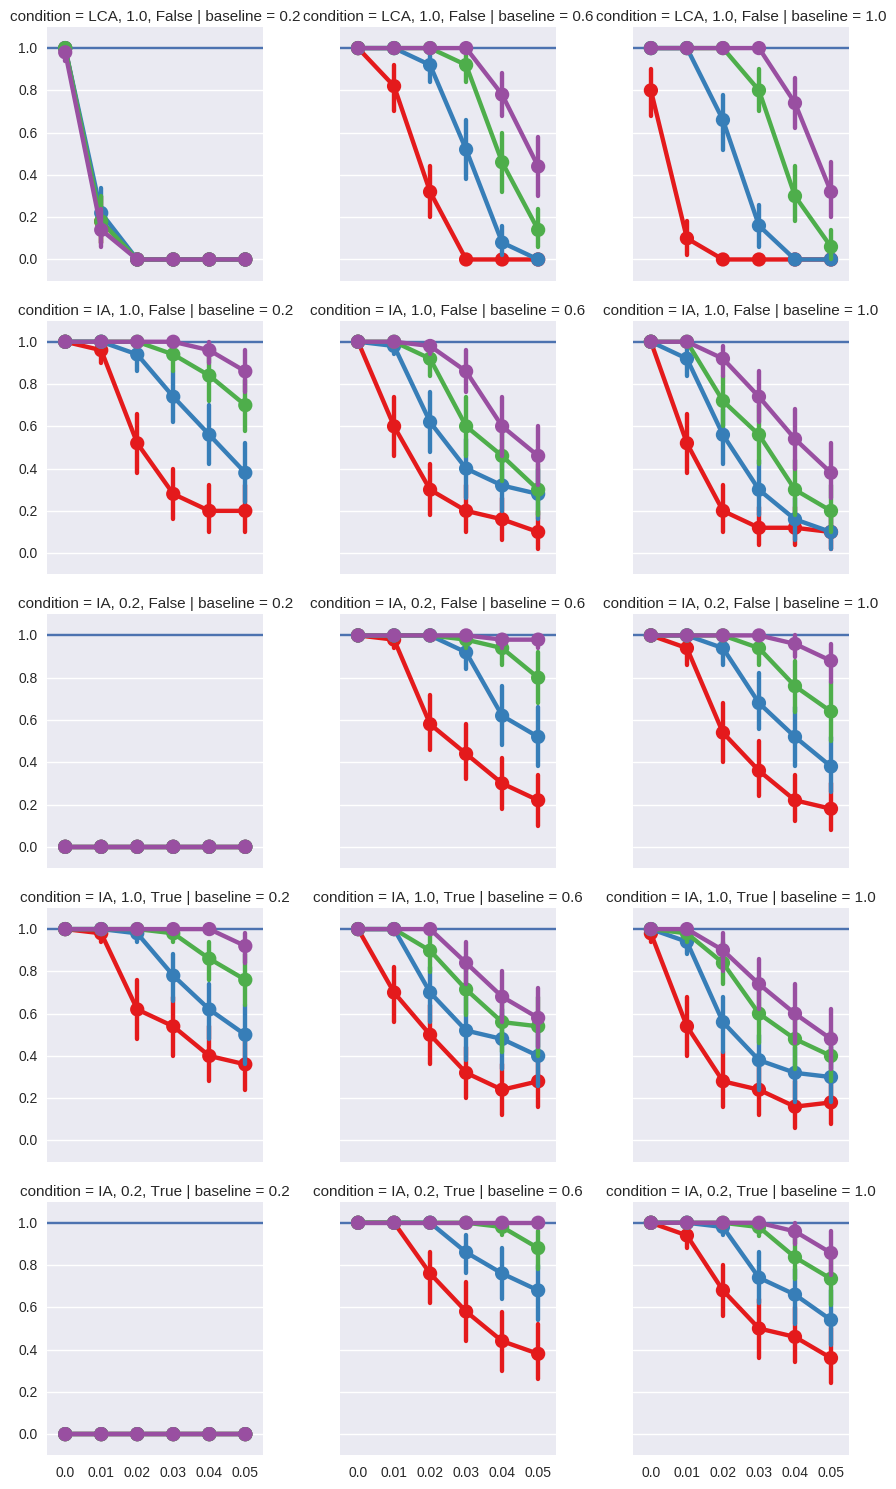

In [7]:
g = sns.FacetGrid(df, row='condition', col='baseline', row_order=cond_order)
g.map(sns.pointplot, 'noise', 'correct', 'target_sep', palette='Set1')
g.map(plt.axhline, y=1.)
g.set(ylim=(-0.1, 1.1))

# Timing

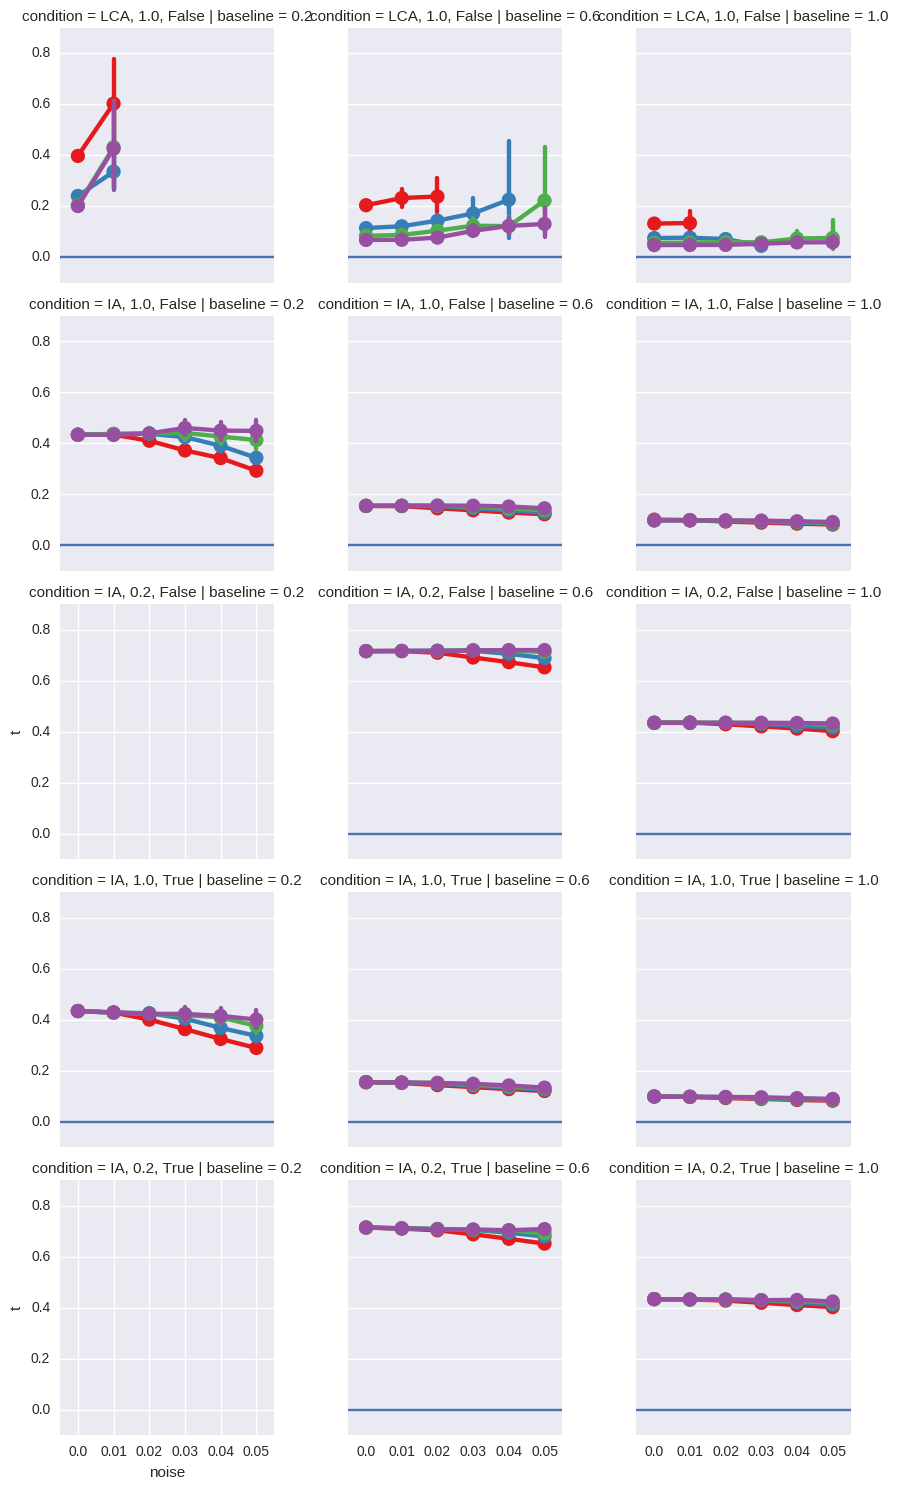

In [8]:
g = sns.FacetGrid(dfd, row='condition', col='baseline', row_order=cond_order)
g.map(sns.pointplot, 'noise', 't', 'target_sep', palette='Set1')
g.map(plt.axhline, y=0.)

# Transient response

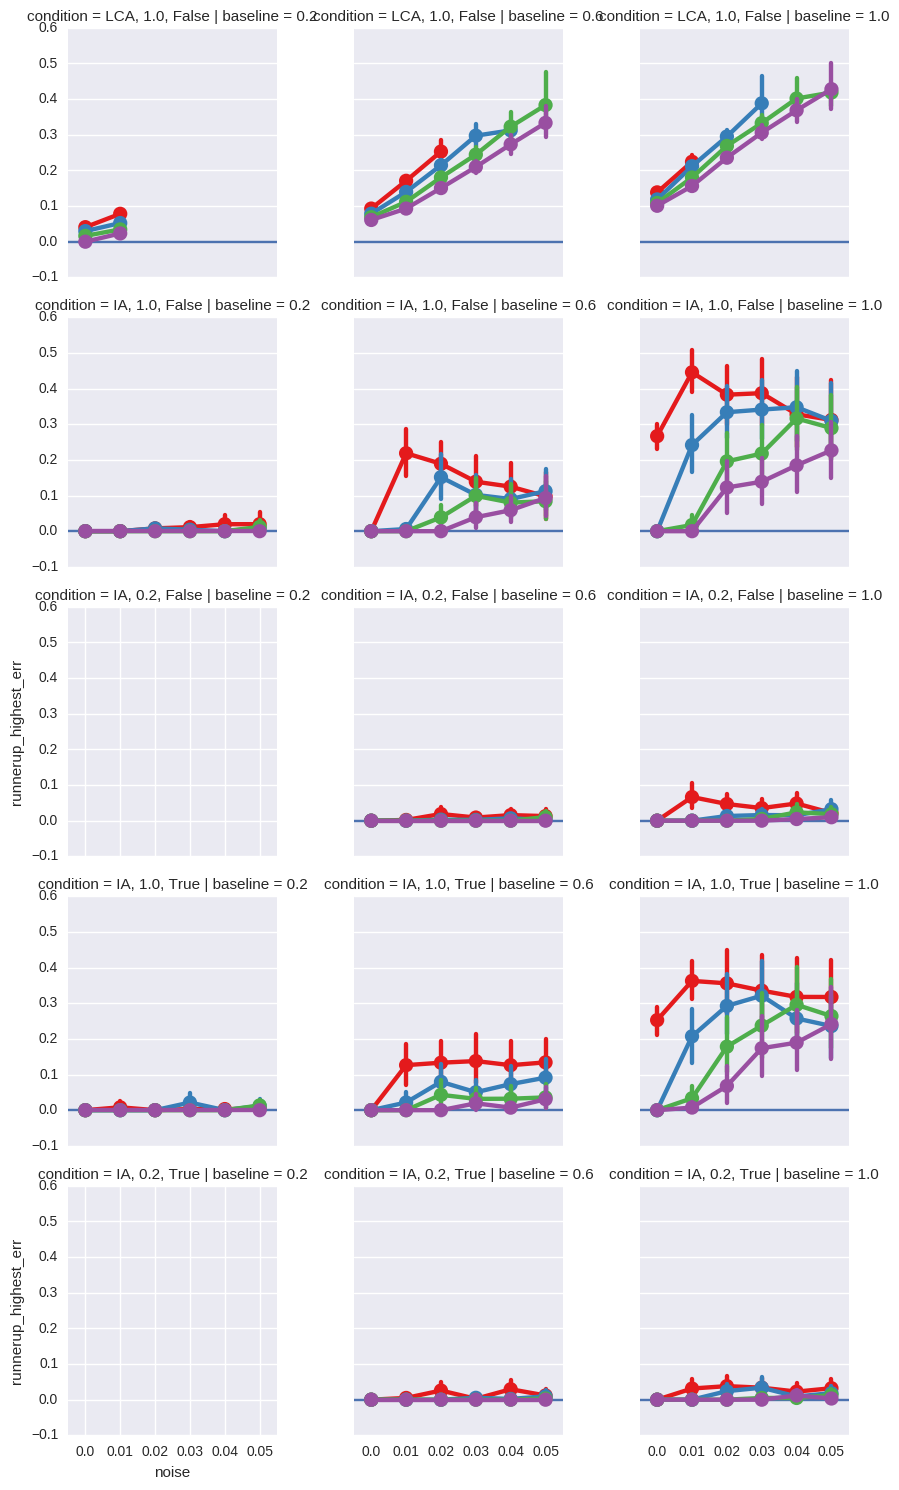

In [9]:
g = sns.FacetGrid(dfd, row='condition', col='baseline', row_order=cond_order)
g.map(sns.pointplot, 'noise', 'runnerup_highest_err', 'target_sep', palette='Set1')
g.map(plt.axhline, y=0.)